# GAN Training

## imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN_IMP import GAN
from utils.loaders import load_mnist_gan

Using TensorFlow backend.


In [2]:
RUN_ID = '0006'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist_gan()

## architecture

In [4]:
INPUT_DIM = (28,28,1)

CONV_FILTERS = [64,64,128, 256]
CONV_KERNEL_SIZES = [4,4,4,4]
CONV_STRIDES = [2,2,2,1]
CONV_PADDINGS = ['same', 'same', 'same', 'same']

CONV_T_FILTERS = [128,64,1]
CONV_T_KERNEL_SIZES = [4,4,4]
CONV_T_STRIDES = [1,2,2]
CONV_T_PADDINGS = ['same','same','same']

Z_DIM = 100


In [5]:
gan = GAN(INPUT_DIM
                , CONV_FILTERS
                , CONV_KERNEL_SIZES
                , CONV_STRIDES
                , CONV_PADDINGS
                , CONV_T_FILTERS
                , CONV_T_KERNEL_SIZES
                , CONV_T_STRIDES
                , CONV_T_PADDINGS
                , Z_DIM
                 )

gan.save(RUN_FOLDER)

In [6]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [7]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          65536     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 8, 8, 64)          0         
__________

In [8]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6272)              633472    
_________________________________________________________________
activation_1 (Activation)    (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 7, 7, 128)         262144    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 128)         512       
__________

## training

In [9]:
BATCH_SIZE = 32
EPOCHS = 40000
PRINT_EVERY_N_BATCHES = 10
INITIAL_EPOCH = 0

In [10]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 40000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
    ,discriminator_training_loops = 5
)

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: -0.000174] [G loss: 0.000311]
1 [D loss: -0.000173] [G loss: 0.000311]
2 [D loss: -0.000175] [G loss: 0.000309]
3 [D loss: -0.000176] [G loss: 0.000308]
4 [D loss: -0.000177] [G loss: 0.000307]
5 [D loss: -0.000177] [G loss: 0.000307]
6 [D loss: -0.000177] [G loss: 0.000307]
7 [D loss: -0.000177] [G loss: 0.000308]
8 [D loss: -0.000177] [G loss: 0.000310]
9 [D loss: -0.000177] [G loss: 0.000313]
10 [D loss: -0.000177] [G loss: 0.000314]
11 [D loss: -0.000177] [G loss: 0.000319]
12 [D loss: -0.000177] [G loss: 0.000327]
13 [D loss: -0.000176] [G loss: 0.000336]
14 [D loss: -0.000175] [G loss: 0.000347]
15 [D loss: -0.000175] [G loss: 0.000359]
16 [D loss: -0.000176] [G loss: 0.000371]
17 [D loss: -0.000177] [G loss: 0.000380]
18 [D loss: -0.000179] [G loss: 0.000389]
19 [D loss: -0.000183] [G loss: 0.000397]
20 [D loss: -0.000187] [G loss: 0.000404]
21 [D loss: -0.000192] [G loss: 0.000410]
22 [D loss: -0.000197] [G loss: 0.000415]
23 [D loss: -0.000202] [G loss: 0.000418]
24

195 [D loss: 0.014110] [G loss: -0.006512]
196 [D loss: 0.014238] [G loss: -0.006669]
197 [D loss: 0.014170] [G loss: -0.007069]
198 [D loss: 0.013567] [G loss: -0.006962]
199 [D loss: 0.013534] [G loss: -0.006877]
200 [D loss: 0.014316] [G loss: -0.006760]
201 [D loss: 0.013864] [G loss: -0.007087]
202 [D loss: 0.013430] [G loss: -0.006440]
203 [D loss: 0.013905] [G loss: -0.006707]
204 [D loss: 0.013579] [G loss: -0.007286]
205 [D loss: 0.013638] [G loss: -0.007183]
206 [D loss: 0.013935] [G loss: -0.007580]
207 [D loss: 0.015962] [G loss: -0.007490]
208 [D loss: 0.013835] [G loss: -0.007551]
209 [D loss: 0.013959] [G loss: -0.007681]
210 [D loss: 0.014315] [G loss: -0.007646]
211 [D loss: 0.015005] [G loss: -0.007260]
212 [D loss: 0.014586] [G loss: -0.007638]
213 [D loss: 0.014562] [G loss: -0.007708]
214 [D loss: 0.015250] [G loss: -0.007811]
215 [D loss: 0.014310] [G loss: -0.008030]
216 [D loss: 0.015511] [G loss: -0.008048]
217 [D loss: 0.014436] [G loss: -0.008064]
218 [D loss

386 [D loss: 0.011083] [G loss: -0.007877]
387 [D loss: 0.011952] [G loss: -0.007699]
388 [D loss: 0.010989] [G loss: -0.009702]
389 [D loss: 0.012277] [G loss: -0.008862]
390 [D loss: 0.012772] [G loss: -0.008528]
391 [D loss: 0.010172] [G loss: -0.009266]
392 [D loss: 0.011391] [G loss: -0.008103]
393 [D loss: 0.010466] [G loss: -0.008970]
394 [D loss: 0.009634] [G loss: -0.008768]
395 [D loss: 0.010335] [G loss: -0.009721]
396 [D loss: 0.009635] [G loss: -0.008225]
397 [D loss: 0.010248] [G loss: -0.010369]
398 [D loss: 0.009012] [G loss: -0.008519]
399 [D loss: 0.010975] [G loss: -0.009402]
400 [D loss: 0.009661] [G loss: -0.009242]
401 [D loss: 0.009428] [G loss: -0.009560]
402 [D loss: 0.009920] [G loss: -0.009817]
403 [D loss: 0.007604] [G loss: -0.009670]
404 [D loss: 0.008099] [G loss: -0.010258]
405 [D loss: 0.010048] [G loss: -0.010874]
406 [D loss: 0.008852] [G loss: -0.011567]
407 [D loss: 0.007958] [G loss: -0.010900]
408 [D loss: 0.010839] [G loss: -0.010758]
409 [D loss

577 [D loss: 0.008352] [G loss: -0.004772]
578 [D loss: 0.005718] [G loss: -0.006142]
579 [D loss: 0.003203] [G loss: -0.005738]
580 [D loss: 0.007764] [G loss: -0.004638]
581 [D loss: 0.007432] [G loss: -0.006180]
582 [D loss: 0.004186] [G loss: -0.005713]
583 [D loss: 0.005048] [G loss: -0.004990]
584 [D loss: 0.005237] [G loss: -0.005447]
585 [D loss: 0.005124] [G loss: -0.004633]
586 [D loss: 0.003460] [G loss: -0.005001]
587 [D loss: 0.005682] [G loss: -0.003934]
588 [D loss: 0.002742] [G loss: -0.003750]
589 [D loss: 0.003266] [G loss: -0.006375]
590 [D loss: 0.007927] [G loss: -0.004783]
591 [D loss: 0.006090] [G loss: -0.005656]
592 [D loss: 0.003260] [G loss: -0.005957]
593 [D loss: 0.005448] [G loss: -0.004401]
594 [D loss: 0.003328] [G loss: -0.006195]
595 [D loss: 0.003626] [G loss: -0.005491]
596 [D loss: 0.002413] [G loss: -0.006522]
597 [D loss: 0.004035] [G loss: -0.005697]
598 [D loss: 0.004980] [G loss: -0.006911]
599 [D loss: 0.006313] [G loss: -0.005800]
600 [D loss

768 [D loss: -0.000345] [G loss: -0.005514]
769 [D loss: -0.001056] [G loss: -0.005503]
770 [D loss: 0.001274] [G loss: -0.005729]
771 [D loss: 0.000810] [G loss: -0.006003]
772 [D loss: 0.000336] [G loss: -0.006644]
773 [D loss: 0.001377] [G loss: -0.006655]
774 [D loss: 0.000374] [G loss: -0.007071]
775 [D loss: 0.001127] [G loss: -0.006495]
776 [D loss: 0.000421] [G loss: -0.006690]
777 [D loss: 0.000303] [G loss: -0.006578]
778 [D loss: 0.000794] [G loss: -0.006689]
779 [D loss: -0.000414] [G loss: -0.006677]
780 [D loss: 0.000092] [G loss: -0.006712]
781 [D loss: -0.000269] [G loss: -0.006387]
782 [D loss: -0.000722] [G loss: -0.006077]
783 [D loss: 0.001596] [G loss: -0.005611]
784 [D loss: -0.000054] [G loss: -0.005371]
785 [D loss: -0.000262] [G loss: -0.004845]
786 [D loss: 0.001026] [G loss: -0.005896]
787 [D loss: 0.001624] [G loss: -0.006158]
788 [D loss: 0.002187] [G loss: -0.006072]
789 [D loss: 0.001280] [G loss: -0.006568]
790 [D loss: -0.001007] [G loss: -0.006085]
791

956 [D loss: -0.000330] [G loss: -0.005414]
957 [D loss: -0.000975] [G loss: -0.005275]
958 [D loss: -0.000897] [G loss: -0.005240]
959 [D loss: -0.000931] [G loss: -0.004922]
960 [D loss: -0.000571] [G loss: -0.005065]
961 [D loss: -0.000972] [G loss: -0.005209]
962 [D loss: -0.001359] [G loss: -0.004994]
963 [D loss: -0.000744] [G loss: -0.005326]
964 [D loss: -0.000372] [G loss: -0.005386]
965 [D loss: -0.000888] [G loss: -0.005159]
966 [D loss: -0.000503] [G loss: -0.005118]
967 [D loss: -0.000888] [G loss: -0.005227]
968 [D loss: -0.000650] [G loss: -0.005320]
969 [D loss: -0.001206] [G loss: -0.005372]
970 [D loss: -0.000610] [G loss: -0.005353]
971 [D loss: -0.001208] [G loss: -0.005363]
972 [D loss: -0.001278] [G loss: -0.004573]
973 [D loss: -0.001126] [G loss: -0.005111]
974 [D loss: -0.000501] [G loss: -0.005151]
975 [D loss: -0.000836] [G loss: -0.005359]
976 [D loss: -0.000509] [G loss: -0.005174]
977 [D loss: -0.001358] [G loss: -0.005023]
978 [D loss: -0.001147] [G loss:

1140 [D loss: -0.001169] [G loss: 0.000489]
1141 [D loss: -0.001143] [G loss: 0.000510]
1142 [D loss: -0.001087] [G loss: 0.000480]
1143 [D loss: -0.001068] [G loss: 0.000499]
1144 [D loss: -0.001083] [G loss: 0.000486]
1145 [D loss: -0.001084] [G loss: 0.000481]
1146 [D loss: -0.001053] [G loss: 0.000469]
1147 [D loss: -0.001063] [G loss: 0.000475]
1148 [D loss: -0.001038] [G loss: 0.000544]
1149 [D loss: -0.001059] [G loss: 0.000536]
1150 [D loss: -0.001077] [G loss: 0.000599]
1151 [D loss: -0.001059] [G loss: 0.000639]
1152 [D loss: -0.001087] [G loss: 0.000629]
1153 [D loss: -0.001025] [G loss: 0.000539]
1154 [D loss: -0.001093] [G loss: 0.000573]
1155 [D loss: -0.001091] [G loss: 0.000584]
1156 [D loss: -0.001063] [G loss: 0.000586]
1157 [D loss: -0.001078] [G loss: 0.000557]
1158 [D loss: -0.001093] [G loss: 0.000552]
1159 [D loss: -0.001068] [G loss: 0.000558]
1160 [D loss: -0.001081] [G loss: 0.000615]
1161 [D loss: -0.001074] [G loss: 0.000593]
1162 [D loss: -0.001049] [G loss

1327 [D loss: -0.001033] [G loss: 0.000404]
1328 [D loss: -0.001038] [G loss: 0.000400]
1329 [D loss: -0.001041] [G loss: 0.000391]
1330 [D loss: -0.001033] [G loss: 0.000385]
1331 [D loss: -0.001040] [G loss: 0.000401]
1332 [D loss: -0.001039] [G loss: 0.000399]
1333 [D loss: -0.001044] [G loss: 0.000398]
1334 [D loss: -0.001035] [G loss: 0.000374]
1335 [D loss: -0.001030] [G loss: 0.000367]
1336 [D loss: -0.001050] [G loss: 0.000388]
1337 [D loss: -0.001051] [G loss: 0.000407]
1338 [D loss: -0.001035] [G loss: 0.000373]
1339 [D loss: -0.001027] [G loss: 0.000356]
1340 [D loss: -0.001039] [G loss: 0.000354]
1341 [D loss: -0.001048] [G loss: 0.000374]
1342 [D loss: -0.001042] [G loss: 0.000357]
1343 [D loss: -0.001035] [G loss: 0.000363]
1344 [D loss: -0.001035] [G loss: 0.000363]
1345 [D loss: -0.001039] [G loss: 0.000364]
1346 [D loss: -0.001045] [G loss: 0.000360]
1347 [D loss: -0.001032] [G loss: 0.000338]
1348 [D loss: -0.001041] [G loss: 0.000351]
1349 [D loss: -0.001037] [G loss

1513 [D loss: -0.001035] [G loss: -0.000132]
1514 [D loss: -0.001036] [G loss: -0.000134]
1515 [D loss: -0.001035] [G loss: -0.000138]
1516 [D loss: -0.001035] [G loss: -0.000145]
1517 [D loss: -0.001043] [G loss: -0.000147]
1518 [D loss: -0.001037] [G loss: -0.000160]
1519 [D loss: -0.001033] [G loss: -0.000155]
1520 [D loss: -0.001034] [G loss: -0.000156]
1521 [D loss: -0.001036] [G loss: -0.000158]
1522 [D loss: -0.001030] [G loss: -0.000168]
1523 [D loss: -0.001035] [G loss: -0.000169]
1524 [D loss: -0.001033] [G loss: -0.000171]
1525 [D loss: -0.001034] [G loss: -0.000171]
1526 [D loss: -0.001031] [G loss: -0.000172]
1527 [D loss: -0.001037] [G loss: -0.000174]
1528 [D loss: -0.001035] [G loss: -0.000182]
1529 [D loss: -0.001026] [G loss: -0.000206]
1530 [D loss: -0.001032] [G loss: -0.000190]
1531 [D loss: -0.001033] [G loss: -0.000191]
1532 [D loss: -0.001035] [G loss: -0.000186]
1533 [D loss: -0.001032] [G loss: -0.000197]
1534 [D loss: -0.001033] [G loss: -0.000200]
1535 [D lo

1696 [D loss: -0.001032] [G loss: -0.000633]
1697 [D loss: -0.001035] [G loss: -0.000638]
1698 [D loss: -0.001034] [G loss: -0.000627]
1699 [D loss: -0.001030] [G loss: -0.000642]
1700 [D loss: -0.001029] [G loss: -0.000649]
1701 [D loss: -0.001032] [G loss: -0.000642]
1702 [D loss: -0.001033] [G loss: -0.000645]
1703 [D loss: -0.001024] [G loss: -0.000665]
1704 [D loss: -0.001027] [G loss: -0.000661]
1705 [D loss: -0.001027] [G loss: -0.000669]
1706 [D loss: -0.001027] [G loss: -0.000674]
1707 [D loss: -0.001029] [G loss: -0.000668]
1708 [D loss: -0.001028] [G loss: -0.000667]
1709 [D loss: -0.001028] [G loss: -0.000683]
1710 [D loss: -0.001036] [G loss: -0.000676]
1711 [D loss: -0.001026] [G loss: -0.000678]
1712 [D loss: -0.001029] [G loss: -0.000689]
1713 [D loss: -0.001033] [G loss: -0.000681]
1714 [D loss: -0.001036] [G loss: -0.000671]
1715 [D loss: -0.001033] [G loss: -0.000681]
1716 [D loss: -0.001029] [G loss: -0.000689]
1717 [D loss: -0.001032] [G loss: -0.000694]
1718 [D lo

1879 [D loss: -0.001025] [G loss: -0.001077]
1880 [D loss: -0.001022] [G loss: -0.001101]
1881 [D loss: -0.001021] [G loss: -0.001104]
1882 [D loss: -0.001022] [G loss: -0.001096]
1883 [D loss: -0.001013] [G loss: -0.001112]
1884 [D loss: -0.001025] [G loss: -0.001089]
1885 [D loss: -0.001016] [G loss: -0.001113]
1886 [D loss: -0.001027] [G loss: -0.001094]
1887 [D loss: -0.001029] [G loss: -0.001093]
1888 [D loss: -0.001028] [G loss: -0.001104]
1889 [D loss: -0.001028] [G loss: -0.001100]
1890 [D loss: -0.001035] [G loss: -0.001101]
1891 [D loss: -0.001028] [G loss: -0.001101]
1892 [D loss: -0.001018] [G loss: -0.001124]
1893 [D loss: -0.001030] [G loss: -0.001115]
1894 [D loss: -0.001029] [G loss: -0.001105]
1895 [D loss: -0.001032] [G loss: -0.001105]
1896 [D loss: -0.001030] [G loss: -0.001102]
1897 [D loss: -0.001014] [G loss: -0.001128]
1898 [D loss: -0.001032] [G loss: -0.001113]
1899 [D loss: -0.001033] [G loss: -0.001122]
1900 [D loss: -0.001028] [G loss: -0.001128]
1901 [D lo

2062 [D loss: -0.001026] [G loss: -0.001426]
2063 [D loss: -0.001036] [G loss: -0.001423]
2064 [D loss: -0.001024] [G loss: -0.001429]
2065 [D loss: -0.001024] [G loss: -0.001432]
2066 [D loss: -0.001027] [G loss: -0.001435]
2067 [D loss: -0.001022] [G loss: -0.001438]
2068 [D loss: -0.001022] [G loss: -0.001435]
2069 [D loss: -0.001027] [G loss: -0.001453]
2070 [D loss: -0.001026] [G loss: -0.001444]
2071 [D loss: -0.001029] [G loss: -0.001433]
2072 [D loss: -0.001023] [G loss: -0.001448]
2073 [D loss: -0.001023] [G loss: -0.001443]
2074 [D loss: -0.001026] [G loss: -0.001445]
2075 [D loss: -0.001017] [G loss: -0.001464]
2076 [D loss: -0.001020] [G loss: -0.001477]
2077 [D loss: -0.001020] [G loss: -0.001461]
2078 [D loss: -0.001027] [G loss: -0.001448]
2079 [D loss: -0.001025] [G loss: -0.001453]
2080 [D loss: -0.001024] [G loss: -0.001461]
2081 [D loss: -0.001027] [G loss: -0.001448]
2082 [D loss: -0.001023] [G loss: -0.001458]
2083 [D loss: -0.001028] [G loss: -0.001446]
2084 [D lo

2245 [D loss: -0.001025] [G loss: -0.001636]
2246 [D loss: -0.001024] [G loss: -0.001642]
2247 [D loss: -0.001025] [G loss: -0.001640]
2248 [D loss: -0.001031] [G loss: -0.001633]
2249 [D loss: -0.001028] [G loss: -0.001642]
2250 [D loss: -0.001033] [G loss: -0.001640]
2251 [D loss: -0.001023] [G loss: -0.001649]
2252 [D loss: -0.001023] [G loss: -0.001647]
2253 [D loss: -0.001024] [G loss: -0.001649]
2254 [D loss: -0.001024] [G loss: -0.001645]
2255 [D loss: -0.001026] [G loss: -0.001642]
2256 [D loss: -0.001025] [G loss: -0.001645]
2257 [D loss: -0.001029] [G loss: -0.001635]
2258 [D loss: -0.001028] [G loss: -0.001637]
2259 [D loss: -0.001026] [G loss: -0.001645]
2260 [D loss: -0.001023] [G loss: -0.001650]
2261 [D loss: -0.001025] [G loss: -0.001653]
2262 [D loss: -0.001024] [G loss: -0.001651]
2263 [D loss: -0.001025] [G loss: -0.001646]
2264 [D loss: -0.001028] [G loss: -0.001645]
2265 [D loss: -0.001028] [G loss: -0.001656]
2266 [D loss: -0.001030] [G loss: -0.001658]
2267 [D lo

2428 [D loss: -0.001027] [G loss: -0.001777]
2429 [D loss: -0.001026] [G loss: -0.001777]
2430 [D loss: -0.001025] [G loss: -0.001785]
2431 [D loss: -0.001027] [G loss: -0.001784]
2432 [D loss: -0.001026] [G loss: -0.001779]
2433 [D loss: -0.001024] [G loss: -0.001789]
2434 [D loss: -0.001023] [G loss: -0.001785]
2435 [D loss: -0.001025] [G loss: -0.001788]
2436 [D loss: -0.001026] [G loss: -0.001785]
2437 [D loss: -0.001026] [G loss: -0.001784]
2438 [D loss: -0.001028] [G loss: -0.001778]
2439 [D loss: -0.001022] [G loss: -0.001795]
2440 [D loss: -0.001028] [G loss: -0.001782]
2441 [D loss: -0.001025] [G loss: -0.001791]
2442 [D loss: -0.001024] [G loss: -0.001793]
2443 [D loss: -0.001027] [G loss: -0.001785]
2444 [D loss: -0.001025] [G loss: -0.001788]
2445 [D loss: -0.001025] [G loss: -0.001789]
2446 [D loss: -0.001026] [G loss: -0.001792]
2447 [D loss: -0.001024] [G loss: -0.001794]
2448 [D loss: -0.001028] [G loss: -0.001787]
2449 [D loss: -0.001026] [G loss: -0.001794]
2450 [D lo

2611 [D loss: -0.001028] [G loss: -0.001832]
2612 [D loss: -0.001025] [G loss: -0.001842]
2613 [D loss: -0.001025] [G loss: -0.001835]
2614 [D loss: -0.001026] [G loss: -0.001843]
2615 [D loss: -0.001027] [G loss: -0.001835]
2616 [D loss: -0.001024] [G loss: -0.001843]
2617 [D loss: -0.001026] [G loss: -0.001839]
2618 [D loss: -0.001025] [G loss: -0.001848]
2619 [D loss: -0.001028] [G loss: -0.001839]
2620 [D loss: -0.001025] [G loss: -0.001850]
2621 [D loss: -0.001025] [G loss: -0.001845]
2622 [D loss: -0.001026] [G loss: -0.001847]
2623 [D loss: -0.001025] [G loss: -0.001847]
2624 [D loss: -0.001026] [G loss: -0.001847]
2625 [D loss: -0.001025] [G loss: -0.001851]
2626 [D loss: -0.001025] [G loss: -0.001849]
2627 [D loss: -0.001025] [G loss: -0.001849]
2628 [D loss: -0.001024] [G loss: -0.001858]
2629 [D loss: -0.001025] [G loss: -0.001852]
2630 [D loss: -0.001025] [G loss: -0.001855]
2631 [D loss: -0.001025] [G loss: -0.001857]
2632 [D loss: -0.001025] [G loss: -0.001858]
2633 [D lo

2794 [D loss: -0.001026] [G loss: -0.001883]
2795 [D loss: -0.001026] [G loss: -0.001883]
2796 [D loss: -0.001025] [G loss: -0.001883]
2797 [D loss: -0.001028] [G loss: -0.001884]
2798 [D loss: -0.001026] [G loss: -0.001886]
2799 [D loss: -0.001027] [G loss: -0.001886]
2800 [D loss: -0.001026] [G loss: -0.001888]
2801 [D loss: -0.001027] [G loss: -0.001886]
2802 [D loss: -0.001025] [G loss: -0.001893]
2803 [D loss: -0.001026] [G loss: -0.001891]
2804 [D loss: -0.001027] [G loss: -0.001891]
2805 [D loss: -0.001025] [G loss: -0.001893]
2806 [D loss: -0.001029] [G loss: -0.001890]
2807 [D loss: -0.001024] [G loss: -0.001883]
2808 [D loss: -0.001026] [G loss: -0.001884]
2809 [D loss: -0.001025] [G loss: -0.001883]
2810 [D loss: -0.001024] [G loss: -0.001890]
2811 [D loss: -0.001026] [G loss: -0.001885]
2812 [D loss: -0.001025] [G loss: -0.001887]
2813 [D loss: -0.001026] [G loss: -0.001869]
2814 [D loss: -0.001025] [G loss: -0.001874]
2815 [D loss: -0.001024] [G loss: -0.001872]
2816 [D lo

2977 [D loss: -0.001025] [G loss: -0.001945]
2978 [D loss: -0.001025] [G loss: -0.001944]
2979 [D loss: -0.001025] [G loss: -0.001948]
2980 [D loss: -0.001025] [G loss: -0.001945]
2981 [D loss: -0.001025] [G loss: -0.001952]
2982 [D loss: -0.001025] [G loss: -0.001947]
2983 [D loss: -0.001025] [G loss: -0.001947]
2984 [D loss: -0.001023] [G loss: -0.001953]
2985 [D loss: -0.001024] [G loss: -0.001957]
2986 [D loss: -0.001026] [G loss: -0.001946]
2987 [D loss: -0.001023] [G loss: -0.001956]
2988 [D loss: -0.001026] [G loss: -0.001948]
2989 [D loss: -0.001025] [G loss: -0.001949]
2990 [D loss: -0.001026] [G loss: -0.001951]
2991 [D loss: -0.001024] [G loss: -0.001957]
2992 [D loss: -0.001026] [G loss: -0.001949]
2993 [D loss: -0.001025] [G loss: -0.001955]
2994 [D loss: -0.001025] [G loss: -0.001951]
2995 [D loss: -0.001024] [G loss: -0.001958]
2996 [D loss: -0.001025] [G loss: -0.001950]
2997 [D loss: -0.001024] [G loss: -0.001956]
2998 [D loss: -0.001028] [G loss: -0.001950]
2999 [D lo

3160 [D loss: -0.001024] [G loss: -0.001963]
3161 [D loss: -0.001027] [G loss: -0.001958]
3162 [D loss: -0.001025] [G loss: -0.001960]
3163 [D loss: -0.001026] [G loss: -0.001961]
3164 [D loss: -0.001024] [G loss: -0.001963]
3165 [D loss: -0.001026] [G loss: -0.001962]
3166 [D loss: -0.001024] [G loss: -0.001965]
3167 [D loss: -0.001025] [G loss: -0.001966]
3168 [D loss: -0.001026] [G loss: -0.001964]
3169 [D loss: -0.001025] [G loss: -0.001966]
3170 [D loss: -0.001025] [G loss: -0.001964]
3171 [D loss: -0.001024] [G loss: -0.001968]
3172 [D loss: -0.001024] [G loss: -0.001965]
3173 [D loss: -0.001024] [G loss: -0.001972]
3174 [D loss: -0.001026] [G loss: -0.001952]
3175 [D loss: -0.001025] [G loss: -0.001953]
3176 [D loss: -0.001026] [G loss: -0.001955]
3177 [D loss: -0.001025] [G loss: -0.001959]
3178 [D loss: -0.001025] [G loss: -0.001957]
3179 [D loss: -0.001026] [G loss: -0.001957]
3180 [D loss: -0.001024] [G loss: -0.001962]
3181 [D loss: -0.001025] [G loss: -0.001958]
3182 [D lo

3343 [D loss: -0.001025] [G loss: -0.001979]
3344 [D loss: -0.001024] [G loss: -0.001984]
3345 [D loss: -0.001026] [G loss: -0.001980]
3346 [D loss: -0.001025] [G loss: -0.001983]
3347 [D loss: -0.001027] [G loss: -0.001981]
3348 [D loss: -0.001024] [G loss: -0.001988]
3349 [D loss: -0.001027] [G loss: -0.001983]
3350 [D loss: -0.001024] [G loss: -0.001988]
3351 [D loss: -0.001026] [G loss: -0.001984]
3352 [D loss: -0.001024] [G loss: -0.001993]
3353 [D loss: -0.001025] [G loss: -0.001987]
3354 [D loss: -0.001024] [G loss: -0.001990]
3355 [D loss: -0.001025] [G loss: -0.001987]
3356 [D loss: -0.001024] [G loss: -0.001989]
3357 [D loss: -0.001026] [G loss: -0.001987]
3358 [D loss: -0.001025] [G loss: -0.001992]
3359 [D loss: -0.001025] [G loss: -0.001988]
3360 [D loss: -0.001024] [G loss: -0.001994]
3361 [D loss: -0.001025] [G loss: -0.001991]
3362 [D loss: -0.001026] [G loss: -0.001994]
3363 [D loss: -0.001024] [G loss: -0.001992]
3364 [D loss: -0.001025] [G loss: -0.001992]
3365 [D lo

3526 [D loss: -0.001024] [G loss: -0.001997]
3527 [D loss: -0.001024] [G loss: -0.001998]
3528 [D loss: -0.001025] [G loss: -0.001996]
3529 [D loss: -0.001025] [G loss: -0.001999]
3530 [D loss: -0.001025] [G loss: -0.002003]
3531 [D loss: -0.001025] [G loss: -0.002003]
3532 [D loss: -0.001025] [G loss: -0.002001]
3533 [D loss: -0.001024] [G loss: -0.002005]
3534 [D loss: -0.001025] [G loss: -0.002004]
3535 [D loss: -0.001024] [G loss: -0.002007]
3536 [D loss: -0.001025] [G loss: -0.002006]
3537 [D loss: -0.001024] [G loss: -0.002011]
3538 [D loss: -0.001024] [G loss: -0.002008]
3539 [D loss: -0.001024] [G loss: -0.002014]
3540 [D loss: -0.001026] [G loss: -0.002007]
3541 [D loss: -0.001025] [G loss: -0.001994]
3542 [D loss: -0.001024] [G loss: -0.001997]
3543 [D loss: -0.001025] [G loss: -0.002001]
3544 [D loss: -0.001025] [G loss: -0.001999]
3545 [D loss: -0.001024] [G loss: -0.002005]
3546 [D loss: -0.001026] [G loss: -0.002002]
3547 [D loss: -0.001024] [G loss: -0.002004]
3548 [D lo

3709 [D loss: -0.001025] [G loss: -0.002045]
3710 [D loss: -0.001025] [G loss: -0.002046]
3711 [D loss: -0.001026] [G loss: -0.002044]
3712 [D loss: -0.001025] [G loss: -0.002033]
3713 [D loss: -0.001025] [G loss: -0.002036]
3714 [D loss: -0.001024] [G loss: -0.002036]
3715 [D loss: -0.001025] [G loss: -0.002037]
3716 [D loss: -0.001025] [G loss: -0.002038]
3717 [D loss: -0.001025] [G loss: -0.002037]
3718 [D loss: -0.001025] [G loss: -0.002038]
3719 [D loss: -0.001026] [G loss: -0.002036]
3720 [D loss: -0.001025] [G loss: -0.002039]
3721 [D loss: -0.001024] [G loss: -0.002039]
3722 [D loss: -0.001025] [G loss: -0.002039]
3723 [D loss: -0.001025] [G loss: -0.002039]
3724 [D loss: -0.001025] [G loss: -0.002038]
3725 [D loss: -0.001024] [G loss: -0.002042]
3726 [D loss: -0.001027] [G loss: -0.002038]
3727 [D loss: -0.001024] [G loss: -0.002042]
3728 [D loss: -0.001025] [G loss: -0.002042]
3729 [D loss: -0.001025] [G loss: -0.002040]
3730 [D loss: -0.001026] [G loss: -0.002040]
3731 [D lo

3892 [D loss: -0.001026] [G loss: -0.002043]
3893 [D loss: -0.001025] [G loss: -0.002040]
3894 [D loss: -0.001024] [G loss: -0.002042]
3895 [D loss: -0.001024] [G loss: -0.002043]
3896 [D loss: -0.001026] [G loss: -0.002038]
3897 [D loss: -0.001024] [G loss: -0.002044]
3898 [D loss: -0.001025] [G loss: -0.002040]
3899 [D loss: -0.001024] [G loss: -0.002044]
3900 [D loss: -0.001026] [G loss: -0.002039]
3901 [D loss: -0.001024] [G loss: -0.002043]
3902 [D loss: -0.001026] [G loss: -0.002041]
3903 [D loss: -0.001025] [G loss: -0.002042]
3904 [D loss: -0.001025] [G loss: -0.002041]
3905 [D loss: -0.001024] [G loss: -0.002047]
3906 [D loss: -0.001026] [G loss: -0.002042]
3907 [D loss: -0.001024] [G loss: -0.002045]
3908 [D loss: -0.001025] [G loss: -0.002043]
3909 [D loss: -0.001026] [G loss: -0.002044]
3910 [D loss: -0.001024] [G loss: -0.002046]
3911 [D loss: -0.001025] [G loss: -0.002045]
3912 [D loss: -0.001026] [G loss: -0.002043]
3913 [D loss: -0.001025] [G loss: -0.002047]
3914 [D lo

4075 [D loss: -0.001025] [G loss: -0.002050]
4076 [D loss: -0.001025] [G loss: -0.002051]
4077 [D loss: -0.001025] [G loss: -0.002051]
4078 [D loss: -0.001024] [G loss: -0.002050]
4079 [D loss: -0.001024] [G loss: -0.002053]
4080 [D loss: -0.001026] [G loss: -0.002049]
4081 [D loss: -0.001023] [G loss: -0.002055]
4082 [D loss: -0.001026] [G loss: -0.002036]
4083 [D loss: -0.001025] [G loss: -0.002040]
4084 [D loss: -0.001025] [G loss: -0.002038]
4085 [D loss: -0.001025] [G loss: -0.002039]
4086 [D loss: -0.001025] [G loss: -0.002046]
4087 [D loss: -0.001025] [G loss: -0.002039]
4088 [D loss: -0.001025] [G loss: -0.002042]
4089 [D loss: -0.001025] [G loss: -0.002042]
4090 [D loss: -0.001026] [G loss: -0.002040]
4091 [D loss: -0.001024] [G loss: -0.002049]
4092 [D loss: -0.001025] [G loss: -0.002041]
4093 [D loss: -0.001024] [G loss: -0.002046]
4094 [D loss: -0.001025] [G loss: -0.002042]
4095 [D loss: -0.001025] [G loss: -0.002047]
4096 [D loss: -0.001025] [G loss: -0.002042]
4097 [D lo

4258 [D loss: -0.001026] [G loss: -0.002037]
4259 [D loss: -0.001025] [G loss: -0.002038]
4260 [D loss: -0.001025] [G loss: -0.002038]
4261 [D loss: -0.001025] [G loss: -0.002039]
4262 [D loss: -0.001025] [G loss: -0.002038]
4263 [D loss: -0.001024] [G loss: -0.002039]
4264 [D loss: -0.001026] [G loss: -0.002038]
4265 [D loss: -0.001025] [G loss: -0.002040]
4266 [D loss: -0.001025] [G loss: -0.002040]
4267 [D loss: -0.001024] [G loss: -0.002040]
4268 [D loss: -0.001025] [G loss: -0.002040]
4269 [D loss: -0.001025] [G loss: -0.002040]
4270 [D loss: -0.001024] [G loss: -0.002044]
4271 [D loss: -0.001026] [G loss: -0.002041]
4272 [D loss: -0.001024] [G loss: -0.002045]
4273 [D loss: -0.001026] [G loss: -0.002042]
4274 [D loss: -0.001024] [G loss: -0.002044]
4275 [D loss: -0.001025] [G loss: -0.002042]
4276 [D loss: -0.001025] [G loss: -0.002044]
4277 [D loss: -0.001025] [G loss: -0.002042]
4278 [D loss: -0.001024] [G loss: -0.002047]
4279 [D loss: -0.001026] [G loss: -0.002042]
4280 [D lo

4441 [D loss: -0.001024] [G loss: -0.002039]
4442 [D loss: -0.001026] [G loss: -0.002038]
4443 [D loss: -0.001024] [G loss: -0.002041]
4444 [D loss: -0.001026] [G loss: -0.002039]
4445 [D loss: -0.001025] [G loss: -0.002041]
4446 [D loss: -0.001025] [G loss: -0.002041]
4447 [D loss: -0.001025] [G loss: -0.002042]
4448 [D loss: -0.001025] [G loss: -0.002043]
4449 [D loss: -0.001026] [G loss: -0.002041]
4450 [D loss: -0.001024] [G loss: -0.002047]
4451 [D loss: -0.001025] [G loss: -0.002041]
4452 [D loss: -0.001024] [G loss: -0.002046]
4453 [D loss: -0.001026] [G loss: -0.002042]
4454 [D loss: -0.001026] [G loss: -0.002042]
4455 [D loss: -0.001024] [G loss: -0.002049]
4456 [D loss: -0.001025] [G loss: -0.002043]
4457 [D loss: -0.001025] [G loss: -0.002044]
4458 [D loss: -0.001025] [G loss: -0.002045]
4459 [D loss: -0.001025] [G loss: -0.002045]
4460 [D loss: -0.001025] [G loss: -0.002044]
4461 [D loss: -0.001025] [G loss: -0.002043]
4462 [D loss: -0.001024] [G loss: -0.002032]
4463 [D lo

4624 [D loss: -0.001025] [G loss: -0.002033]
4625 [D loss: -0.001025] [G loss: -0.002034]
4626 [D loss: -0.001024] [G loss: -0.002034]
4627 [D loss: -0.001024] [G loss: -0.002040]
4628 [D loss: -0.001024] [G loss: -0.002036]
4629 [D loss: -0.001024] [G loss: -0.002040]
4630 [D loss: -0.001025] [G loss: -0.002036]
4631 [D loss: -0.001024] [G loss: -0.002039]
4632 [D loss: -0.001025] [G loss: -0.002036]
4633 [D loss: -0.001024] [G loss: -0.002040]
4634 [D loss: -0.001026] [G loss: -0.002037]
4635 [D loss: -0.001024] [G loss: -0.002039]
4636 [D loss: -0.001025] [G loss: -0.002038]
4637 [D loss: -0.001024] [G loss: -0.002040]
4638 [D loss: -0.001025] [G loss: -0.002040]
4639 [D loss: -0.001025] [G loss: -0.002040]
4640 [D loss: -0.001025] [G loss: -0.002040]
4641 [D loss: -0.001025] [G loss: -0.002040]
4642 [D loss: -0.001025] [G loss: -0.002040]
4643 [D loss: -0.001024] [G loss: -0.002044]
4644 [D loss: -0.001024] [G loss: -0.002041]
4645 [D loss: -0.001024] [G loss: -0.002044]
4646 [D lo

4807 [D loss: -0.001024] [G loss: -0.002041]
4808 [D loss: -0.001025] [G loss: -0.002036]
4809 [D loss: -0.001025] [G loss: -0.002038]
4810 [D loss: -0.001025] [G loss: -0.002038]
4811 [D loss: -0.001025] [G loss: -0.002039]
4812 [D loss: -0.001025] [G loss: -0.002038]
4813 [D loss: -0.001024] [G loss: -0.002043]
4814 [D loss: -0.001025] [G loss: -0.002040]
4815 [D loss: -0.001025] [G loss: -0.002043]
4816 [D loss: -0.001025] [G loss: -0.002042]
4817 [D loss: -0.001024] [G loss: -0.002044]
4818 [D loss: -0.001025] [G loss: -0.002041]
4819 [D loss: -0.001025] [G loss: -0.002041]
4820 [D loss: -0.001025] [G loss: -0.002042]
4821 [D loss: -0.001024] [G loss: -0.002046]
4822 [D loss: -0.001025] [G loss: -0.002043]
4823 [D loss: -0.001024] [G loss: -0.002045]
4824 [D loss: -0.001025] [G loss: -0.002043]
4825 [D loss: -0.001024] [G loss: -0.002044]
4826 [D loss: -0.001025] [G loss: -0.002043]
4827 [D loss: -0.001024] [G loss: -0.002047]
4828 [D loss: -0.001025] [G loss: -0.002044]
4829 [D lo

4990 [D loss: -0.001024] [G loss: -0.002043]
4991 [D loss: -0.001025] [G loss: -0.002041]
4992 [D loss: -0.001025] [G loss: -0.002042]
4993 [D loss: -0.001024] [G loss: -0.002045]
4994 [D loss: -0.001025] [G loss: -0.002042]
4995 [D loss: -0.001025] [G loss: -0.002046]
4996 [D loss: -0.001025] [G loss: -0.002043]
4997 [D loss: -0.001025] [G loss: -0.002044]
4998 [D loss: -0.001025] [G loss: -0.002043]
4999 [D loss: -0.001025] [G loss: -0.002044]
5000 [D loss: -0.001025] [G loss: -0.002042]
5001 [D loss: -0.001024] [G loss: -0.002045]
5002 [D loss: -0.001026] [G loss: -0.002044]
5003 [D loss: -0.001025] [G loss: -0.002046]
5004 [D loss: -0.001026] [G loss: -0.002044]
5005 [D loss: -0.001025] [G loss: -0.002044]
5006 [D loss: -0.001026] [G loss: -0.002044]
5007 [D loss: -0.001024] [G loss: -0.002045]
5008 [D loss: -0.001025] [G loss: -0.002045]
5009 [D loss: -0.001025] [G loss: -0.002048]
5010 [D loss: -0.001025] [G loss: -0.002045]
5011 [D loss: -0.001024] [G loss: -0.002048]
5012 [D lo

5173 [D loss: -0.001024] [G loss: -0.002046]
5174 [D loss: -0.001025] [G loss: -0.002030]
5175 [D loss: -0.001025] [G loss: -0.002034]
5176 [D loss: -0.001025] [G loss: -0.002031]
5177 [D loss: -0.001024] [G loss: -0.002036]
5178 [D loss: -0.001025] [G loss: -0.002034]
5179 [D loss: -0.001025] [G loss: -0.002035]
5180 [D loss: -0.001025] [G loss: -0.002034]
5181 [D loss: -0.001024] [G loss: -0.002036]
5182 [D loss: -0.001025] [G loss: -0.002037]
5183 [D loss: -0.001025] [G loss: -0.002035]
5184 [D loss: -0.001024] [G loss: -0.002038]
5185 [D loss: -0.001025] [G loss: -0.002036]
5186 [D loss: -0.001025] [G loss: -0.002039]
5187 [D loss: -0.001025] [G loss: -0.002038]
5188 [D loss: -0.001025] [G loss: -0.002038]
5189 [D loss: -0.001025] [G loss: -0.002039]
5190 [D loss: -0.001025] [G loss: -0.002040]
5191 [D loss: -0.001024] [G loss: -0.002043]
5192 [D loss: -0.001025] [G loss: -0.002039]
5193 [D loss: -0.001025] [G loss: -0.002041]
5194 [D loss: -0.001024] [G loss: -0.002040]
5195 [D lo

5356 [D loss: -0.001025] [G loss: -0.002042]
5357 [D loss: -0.001025] [G loss: -0.002041]
5358 [D loss: -0.001025] [G loss: -0.002042]
5359 [D loss: -0.001024] [G loss: -0.002044]
5360 [D loss: -0.001024] [G loss: -0.002043]
5361 [D loss: -0.001025] [G loss: -0.002043]
5362 [D loss: -0.001025] [G loss: -0.002044]
5363 [D loss: -0.001025] [G loss: -0.002042]
5364 [D loss: -0.001026] [G loss: -0.002042]
5365 [D loss: -0.001025] [G loss: -0.002042]
5366 [D loss: -0.001025] [G loss: -0.002045]
5367 [D loss: -0.001025] [G loss: -0.002043]
5368 [D loss: -0.001024] [G loss: -0.002046]
5369 [D loss: -0.001025] [G loss: -0.002043]
5370 [D loss: -0.001025] [G loss: -0.002044]
5371 [D loss: -0.001025] [G loss: -0.002045]
5372 [D loss: -0.001025] [G loss: -0.002045]
5373 [D loss: -0.001024] [G loss: -0.002045]
5374 [D loss: -0.001025] [G loss: -0.002046]
5375 [D loss: -0.001025] [G loss: -0.002045]
5376 [D loss: -0.001025] [G loss: -0.002046]
5377 [D loss: -0.001025] [G loss: -0.002044]
5378 [D lo

5539 [D loss: -0.001026] [G loss: -0.002049]
5540 [D loss: -0.001025] [G loss: -0.002050]
5541 [D loss: -0.001025] [G loss: -0.002051]
5542 [D loss: -0.001025] [G loss: -0.002039]
5543 [D loss: -0.001025] [G loss: -0.002039]
5544 [D loss: -0.001025] [G loss: -0.002038]
5545 [D loss: -0.001025] [G loss: -0.002038]
5546 [D loss: -0.001025] [G loss: -0.002039]
5547 [D loss: -0.001025] [G loss: -0.002039]
5548 [D loss: -0.001025] [G loss: -0.002040]
5549 [D loss: -0.001025] [G loss: -0.002040]
5550 [D loss: -0.001025] [G loss: -0.002041]
5551 [D loss: -0.001026] [G loss: -0.002040]
5552 [D loss: -0.001024] [G loss: -0.002044]
5553 [D loss: -0.001026] [G loss: -0.002040]
5554 [D loss: -0.001024] [G loss: -0.002042]
5555 [D loss: -0.001025] [G loss: -0.002041]
5556 [D loss: -0.001024] [G loss: -0.002045]
5557 [D loss: -0.001025] [G loss: -0.002042]
5558 [D loss: -0.001025] [G loss: -0.002045]
5559 [D loss: -0.001025] [G loss: -0.002043]
5560 [D loss: -0.001025] [G loss: -0.002044]
5561 [D lo

5722 [D loss: -0.001025] [G loss: -0.002048]
5723 [D loss: -0.001025] [G loss: -0.002048]
5724 [D loss: -0.001025] [G loss: -0.002048]
5725 [D loss: -0.001025] [G loss: -0.002049]
5726 [D loss: -0.001025] [G loss: -0.002049]
5727 [D loss: -0.001025] [G loss: -0.002048]
5728 [D loss: -0.001025] [G loss: -0.002050]
5729 [D loss: -0.001025] [G loss: -0.002049]
5730 [D loss: -0.001025] [G loss: -0.002048]
5731 [D loss: -0.001025] [G loss: -0.002049]
5732 [D loss: -0.001025] [G loss: -0.002050]
5733 [D loss: -0.001025] [G loss: -0.002048]
5734 [D loss: -0.001024] [G loss: -0.002052]
5735 [D loss: -0.001026] [G loss: -0.002048]
5736 [D loss: -0.001024] [G loss: -0.002050]
5737 [D loss: -0.001025] [G loss: -0.002048]
5738 [D loss: -0.001025] [G loss: -0.002049]
5739 [D loss: -0.001025] [G loss: -0.002048]
5740 [D loss: -0.001025] [G loss: -0.002048]
5741 [D loss: -0.001024] [G loss: -0.002049]
5742 [D loss: -0.001026] [G loss: -0.002048]
5743 [D loss: -0.001024] [G loss: -0.002052]
5744 [D lo

5905 [D loss: -0.001025] [G loss: -0.002041]
5906 [D loss: -0.001024] [G loss: -0.002045]
5907 [D loss: -0.001026] [G loss: -0.002042]
5908 [D loss: -0.001024] [G loss: -0.002044]
5909 [D loss: -0.001025] [G loss: -0.002045]
5910 [D loss: -0.001025] [G loss: -0.002044]
5911 [D loss: -0.001025] [G loss: -0.002043]
5912 [D loss: -0.001025] [G loss: -0.002045]
5913 [D loss: -0.001026] [G loss: -0.002043]
5914 [D loss: -0.001024] [G loss: -0.002045]
5915 [D loss: -0.001025] [G loss: -0.002044]
5916 [D loss: -0.001025] [G loss: -0.002043]
5917 [D loss: -0.001025] [G loss: -0.002044]
5918 [D loss: -0.001025] [G loss: -0.002043]
5919 [D loss: -0.001024] [G loss: -0.002045]
5920 [D loss: -0.001026] [G loss: -0.002044]
5921 [D loss: -0.001024] [G loss: -0.002046]
5922 [D loss: -0.001025] [G loss: -0.002044]
5923 [D loss: -0.001026] [G loss: -0.002045]
5924 [D loss: -0.001025] [G loss: -0.002045]
5925 [D loss: -0.001024] [G loss: -0.002047]
5926 [D loss: -0.001025] [G loss: -0.002045]
5927 [D lo

6088 [D loss: -0.001026] [G loss: -0.001977]
6089 [D loss: -0.001024] [G loss: -0.001981]
6090 [D loss: -0.001026] [G loss: -0.001981]
6091 [D loss: -0.001024] [G loss: -0.001971]
6092 [D loss: -0.001025] [G loss: -0.001976]
6093 [D loss: -0.001025] [G loss: -0.001976]
6094 [D loss: -0.001024] [G loss: -0.001982]
6095 [D loss: -0.001026] [G loss: -0.001974]
6096 [D loss: -0.001025] [G loss: -0.001981]
6097 [D loss: -0.001025] [G loss: -0.001979]
6098 [D loss: -0.001024] [G loss: -0.001984]
6099 [D loss: -0.001025] [G loss: -0.001984]
6100 [D loss: -0.001024] [G loss: -0.001991]
6101 [D loss: -0.001024] [G loss: -0.001988]
6102 [D loss: -0.001024] [G loss: -0.001993]
6103 [D loss: -0.001025] [G loss: -0.001992]
6104 [D loss: -0.001025] [G loss: -0.001995]
6105 [D loss: -0.001025] [G loss: -0.001997]
6106 [D loss: -0.001025] [G loss: -0.001999]
6107 [D loss: -0.001025] [G loss: -0.002001]
6108 [D loss: -0.001025] [G loss: -0.001989]
6109 [D loss: -0.001025] [G loss: -0.001991]
6110 [D lo

6271 [D loss: -0.001025] [G loss: -0.002048]
6272 [D loss: -0.001025] [G loss: -0.002044]
6273 [D loss: -0.001024] [G loss: -0.002045]
6274 [D loss: -0.001025] [G loss: -0.002046]
6275 [D loss: -0.001024] [G loss: -0.002048]
6276 [D loss: -0.001025] [G loss: -0.002045]
6277 [D loss: -0.001025] [G loss: -0.002048]
6278 [D loss: -0.001025] [G loss: -0.002046]
6279 [D loss: -0.001025] [G loss: -0.002033]
6280 [D loss: -0.001025] [G loss: -0.002036]
6281 [D loss: -0.001026] [G loss: -0.002033]
6282 [D loss: -0.001024] [G loss: -0.002036]
6283 [D loss: -0.001025] [G loss: -0.002034]
6284 [D loss: -0.001024] [G loss: -0.002037]
6285 [D loss: -0.001026] [G loss: -0.002035]
6286 [D loss: -0.001024] [G loss: -0.002037]
6287 [D loss: -0.001025] [G loss: -0.002037]
6288 [D loss: -0.001025] [G loss: -0.002039]
6289 [D loss: -0.001025] [G loss: -0.002037]
6290 [D loss: -0.001025] [G loss: -0.002041]
6291 [D loss: -0.001025] [G loss: -0.002038]
6292 [D loss: -0.001025] [G loss: -0.002041]
6293 [D lo

6454 [D loss: -0.001024] [G loss: -0.001997]
6455 [D loss: -0.001025] [G loss: -0.001997]
6456 [D loss: -0.001024] [G loss: -0.002003]
6457 [D loss: -0.001024] [G loss: -0.002003]
6458 [D loss: -0.001024] [G loss: -0.002005]
6459 [D loss: -0.001025] [G loss: -0.002004]
6460 [D loss: -0.001025] [G loss: -0.002007]
6461 [D loss: -0.001024] [G loss: -0.002010]
6462 [D loss: -0.001025] [G loss: -0.002008]
6463 [D loss: -0.001024] [G loss: -0.002014]
6464 [D loss: -0.001025] [G loss: -0.002011]
6465 [D loss: -0.001024] [G loss: -0.002014]
6466 [D loss: -0.001025] [G loss: -0.002015]
6467 [D loss: -0.001025] [G loss: -0.002018]
6468 [D loss: -0.001025] [G loss: -0.002016]
6469 [D loss: -0.001025] [G loss: -0.002019]
6470 [D loss: -0.001024] [G loss: -0.002019]
6471 [D loss: -0.001025] [G loss: -0.002021]
6472 [D loss: -0.001025] [G loss: -0.002022]
6473 [D loss: -0.001025] [G loss: -0.002023]
6474 [D loss: -0.001025] [G loss: -0.002024]
6475 [D loss: -0.001025] [G loss: -0.002023]
6476 [D lo

6637 [D loss: -0.001025] [G loss: -0.002002]
6638 [D loss: -0.001025] [G loss: -0.001993]
6639 [D loss: -0.001025] [G loss: -0.001992]
6640 [D loss: -0.001024] [G loss: -0.001996]
6641 [D loss: -0.001025] [G loss: -0.001996]
6642 [D loss: -0.001025] [G loss: -0.001987]
6643 [D loss: -0.001025] [G loss: -0.001987]
6644 [D loss: -0.001024] [G loss: -0.001991]
6645 [D loss: -0.001025] [G loss: -0.001991]
6646 [D loss: -0.001024] [G loss: -0.001995]
6647 [D loss: -0.001025] [G loss: -0.001995]
6648 [D loss: -0.001024] [G loss: -0.001999]
6649 [D loss: -0.001026] [G loss: -0.001999]
6650 [D loss: -0.001024] [G loss: -0.002003]
6651 [D loss: -0.001025] [G loss: -0.002003]
6652 [D loss: -0.001025] [G loss: -0.002005]
6653 [D loss: -0.001025] [G loss: -0.002008]
6654 [D loss: -0.001025] [G loss: -0.002007]
6655 [D loss: -0.001025] [G loss: -0.002010]
6656 [D loss: -0.001025] [G loss: -0.002011]
6657 [D loss: -0.001025] [G loss: -0.002011]
6658 [D loss: -0.001024] [G loss: -0.002014]
6659 [D lo

6820 [D loss: -0.001025] [G loss: -0.002030]
6821 [D loss: -0.001025] [G loss: -0.002031]
6822 [D loss: -0.001025] [G loss: -0.002030]
6823 [D loss: -0.001025] [G loss: -0.002031]
6824 [D loss: -0.001025] [G loss: -0.002031]
6825 [D loss: -0.001024] [G loss: -0.002033]
6826 [D loss: -0.001026] [G loss: -0.002032]
6827 [D loss: -0.001024] [G loss: -0.002036]
6828 [D loss: -0.001025] [G loss: -0.002033]
6829 [D loss: -0.001024] [G loss: -0.002035]
6830 [D loss: -0.001025] [G loss: -0.002034]
6831 [D loss: -0.001025] [G loss: -0.002036]
6832 [D loss: -0.001025] [G loss: -0.002036]
6833 [D loss: -0.001024] [G loss: -0.002037]
6834 [D loss: -0.001025] [G loss: -0.002036]
6835 [D loss: -0.001024] [G loss: -0.002039]
6836 [D loss: -0.001025] [G loss: -0.002036]
6837 [D loss: -0.001024] [G loss: -0.002039]
6838 [D loss: -0.001025] [G loss: -0.002037]
6839 [D loss: -0.001024] [G loss: -0.002040]
6840 [D loss: -0.001025] [G loss: -0.002039]
6841 [D loss: -0.001025] [G loss: -0.002040]
6842 [D lo

7003 [D loss: -0.001024] [G loss: -0.002014]
7004 [D loss: -0.001025] [G loss: -0.002015]
7005 [D loss: -0.001025] [G loss: -0.002004]
7006 [D loss: -0.001026] [G loss: -0.002004]
7007 [D loss: -0.001024] [G loss: -0.002009]
7008 [D loss: -0.001025] [G loss: -0.002007]
7009 [D loss: -0.001025] [G loss: -0.002011]
7010 [D loss: -0.001024] [G loss: -0.002010]
7011 [D loss: -0.001026] [G loss: -0.001998]
7012 [D loss: -0.001024] [G loss: -0.002002]
7013 [D loss: -0.001025] [G loss: -0.002001]
7014 [D loss: -0.001024] [G loss: -0.002004]
7015 [D loss: -0.001025] [G loss: -0.002008]
7016 [D loss: -0.001025] [G loss: -0.002006]
7017 [D loss: -0.001024] [G loss: -0.002008]
7018 [D loss: -0.001026] [G loss: -0.002009]
7019 [D loss: -0.001024] [G loss: -0.002011]
7020 [D loss: -0.001025] [G loss: -0.002014]
7021 [D loss: -0.001025] [G loss: -0.002001]
7022 [D loss: -0.001025] [G loss: -0.002002]
7023 [D loss: -0.001025] [G loss: -0.002004]
7024 [D loss: -0.001026] [G loss: -0.002005]
7025 [D lo

7186 [D loss: -0.001025] [G loss: -0.002031]
7187 [D loss: -0.001024] [G loss: -0.002035]
7188 [D loss: -0.001025] [G loss: -0.002032]
7189 [D loss: -0.001025] [G loss: -0.002035]
7190 [D loss: -0.001025] [G loss: -0.002033]
7191 [D loss: -0.001024] [G loss: -0.002035]
7192 [D loss: -0.001025] [G loss: -0.002034]
7193 [D loss: -0.001025] [G loss: -0.002037]
7194 [D loss: -0.001025] [G loss: -0.002035]
7195 [D loss: -0.001024] [G loss: -0.002038]
7196 [D loss: -0.001025] [G loss: -0.002036]
7197 [D loss: -0.001025] [G loss: -0.002037]
7198 [D loss: -0.001025] [G loss: -0.002037]
7199 [D loss: -0.001025] [G loss: -0.002039]
7200 [D loss: -0.001025] [G loss: -0.002037]
7201 [D loss: -0.001025] [G loss: -0.002040]
7202 [D loss: -0.001024] [G loss: -0.002041]
7203 [D loss: -0.001025] [G loss: -0.002039]
7204 [D loss: -0.001025] [G loss: -0.002040]
7205 [D loss: -0.001024] [G loss: -0.002041]
7206 [D loss: -0.001026] [G loss: -0.002039]
7207 [D loss: -0.001024] [G loss: -0.002043]
7208 [D lo

7369 [D loss: -0.001025] [G loss: -0.002037]
7370 [D loss: -0.001025] [G loss: -0.002034]
7371 [D loss: -0.001025] [G loss: -0.002026]
7372 [D loss: -0.001025] [G loss: -0.002023]
7373 [D loss: -0.001024] [G loss: -0.002025]
7374 [D loss: -0.001026] [G loss: -0.002024]
7375 [D loss: -0.001024] [G loss: -0.002027]
7376 [D loss: -0.001025] [G loss: -0.002025]
7377 [D loss: -0.001025] [G loss: -0.002026]
7378 [D loss: -0.001024] [G loss: -0.002028]
7379 [D loss: -0.001025] [G loss: -0.002028]
7380 [D loss: -0.001025] [G loss: -0.002030]
7381 [D loss: -0.001025] [G loss: -0.002030]
7382 [D loss: -0.001025] [G loss: -0.002031]
7383 [D loss: -0.001025] [G loss: -0.002032]
7384 [D loss: -0.001025] [G loss: -0.002032]
7385 [D loss: -0.001025] [G loss: -0.002032]
7386 [D loss: -0.001025] [G loss: -0.002033]
7387 [D loss: -0.001025] [G loss: -0.002033]
7388 [D loss: -0.001024] [G loss: -0.002035]
7389 [D loss: -0.001025] [G loss: -0.002034]
7390 [D loss: -0.001024] [G loss: -0.002035]
7391 [D lo

7552 [D loss: -0.001025] [G loss: -0.002035]
7553 [D loss: -0.001024] [G loss: -0.002038]
7554 [D loss: -0.001025] [G loss: -0.002035]
7555 [D loss: -0.001024] [G loss: -0.002039]
7556 [D loss: -0.001025] [G loss: -0.002036]
7557 [D loss: -0.001024] [G loss: -0.002038]
7558 [D loss: -0.001025] [G loss: -0.002038]
7559 [D loss: -0.001024] [G loss: -0.002027]
7560 [D loss: -0.001025] [G loss: -0.002026]
7561 [D loss: -0.001025] [G loss: -0.002030]
7562 [D loss: -0.001025] [G loss: -0.002027]
7563 [D loss: -0.001025] [G loss: -0.002031]
7564 [D loss: -0.001025] [G loss: -0.002029]
7565 [D loss: -0.001024] [G loss: -0.002031]
7566 [D loss: -0.001025] [G loss: -0.002017]
7567 [D loss: -0.001025] [G loss: -0.002021]
7568 [D loss: -0.001025] [G loss: -0.002018]
7569 [D loss: -0.001024] [G loss: -0.002021]
7570 [D loss: -0.001025] [G loss: -0.002021]
7571 [D loss: -0.001024] [G loss: -0.002024]
7572 [D loss: -0.001025] [G loss: -0.002022]
7573 [D loss: -0.001025] [G loss: -0.002025]
7574 [D lo

7735 [D loss: -0.001026] [G loss: -0.002028]
7736 [D loss: -0.001024] [G loss: -0.002030]
7737 [D loss: -0.001025] [G loss: -0.002028]
7738 [D loss: -0.001024] [G loss: -0.002030]
7739 [D loss: -0.001025] [G loss: -0.002030]
7740 [D loss: -0.001024] [G loss: -0.002032]
7741 [D loss: -0.001026] [G loss: -0.002031]
7742 [D loss: -0.001024] [G loss: -0.002033]
7743 [D loss: -0.001025] [G loss: -0.002032]
7744 [D loss: -0.001025] [G loss: -0.002034]
7745 [D loss: -0.001025] [G loss: -0.002033]
7746 [D loss: -0.001024] [G loss: -0.002036]
7747 [D loss: -0.001025] [G loss: -0.002034]
7748 [D loss: -0.001024] [G loss: -0.002036]
7749 [D loss: -0.001025] [G loss: -0.002035]
7750 [D loss: -0.001024] [G loss: -0.002039]
7751 [D loss: -0.001025] [G loss: -0.002036]
7752 [D loss: -0.001024] [G loss: -0.002039]
7753 [D loss: -0.001026] [G loss: -0.002037]
7754 [D loss: -0.001024] [G loss: -0.002039]
7755 [D loss: -0.001025] [G loss: -0.002037]
7756 [D loss: -0.001024] [G loss: -0.002040]
7757 [D lo

7918 [D loss: -0.001024] [G loss: -0.002051]
7919 [D loss: -0.001025] [G loss: -0.002048]
7920 [D loss: -0.001024] [G loss: -0.002052]
7921 [D loss: -0.001025] [G loss: -0.002048]
7922 [D loss: -0.001025] [G loss: -0.002049]
7923 [D loss: -0.001025] [G loss: -0.002050]
7924 [D loss: -0.001025] [G loss: -0.002048]
7925 [D loss: -0.001025] [G loss: -0.002049]
7926 [D loss: -0.001025] [G loss: -0.002051]
7927 [D loss: -0.001025] [G loss: -0.002048]
7928 [D loss: -0.001025] [G loss: -0.002050]
7929 [D loss: -0.001025] [G loss: -0.002048]
7930 [D loss: -0.001024] [G loss: -0.002050]
7931 [D loss: -0.001026] [G loss: -0.002048]
7932 [D loss: -0.001024] [G loss: -0.002051]
7933 [D loss: -0.001025] [G loss: -0.002048]
7934 [D loss: -0.001025] [G loss: -0.002051]
7935 [D loss: -0.001025] [G loss: -0.002048]
7936 [D loss: -0.001024] [G loss: -0.002050]
7937 [D loss: -0.001025] [G loss: -0.002048]
7938 [D loss: -0.001024] [G loss: -0.002051]
7939 [D loss: -0.001025] [G loss: -0.002048]
7940 [D lo

8101 [D loss: -0.001025] [G loss: -0.002050]
8102 [D loss: -0.001025] [G loss: -0.002050]
8103 [D loss: -0.001025] [G loss: -0.002049]
8104 [D loss: -0.001025] [G loss: -0.002049]
8105 [D loss: -0.001025] [G loss: -0.002049]
8106 [D loss: -0.001025] [G loss: -0.002049]
8107 [D loss: -0.001024] [G loss: -0.002049]
8108 [D loss: -0.001025] [G loss: -0.002051]
8109 [D loss: -0.001024] [G loss: -0.002049]
8110 [D loss: -0.001024] [G loss: -0.002051]
8111 [D loss: -0.001025] [G loss: -0.002049]
8112 [D loss: -0.001025] [G loss: -0.002049]
8113 [D loss: -0.001024] [G loss: -0.002050]
8114 [D loss: -0.001026] [G loss: -0.002048]
8115 [D loss: -0.001024] [G loss: -0.002053]
8116 [D loss: -0.001025] [G loss: -0.002049]
8117 [D loss: -0.001025] [G loss: -0.002048]
8118 [D loss: -0.001025] [G loss: -0.002050]
8119 [D loss: -0.001025] [G loss: -0.002049]
8120 [D loss: -0.001024] [G loss: -0.002050]
8121 [D loss: -0.001025] [G loss: -0.002048]
8122 [D loss: -0.001024] [G loss: -0.002051]
8123 [D lo

8284 [D loss: -0.001025] [G loss: -0.002044]
8285 [D loss: -0.001025] [G loss: -0.002046]
8286 [D loss: -0.001025] [G loss: -0.002045]
8287 [D loss: -0.001025] [G loss: -0.002046]
8288 [D loss: -0.001025] [G loss: -0.002045]
8289 [D loss: -0.001025] [G loss: -0.002047]
8290 [D loss: -0.001025] [G loss: -0.002045]
8291 [D loss: -0.001025] [G loss: -0.002046]
8292 [D loss: -0.001024] [G loss: -0.002046]
8293 [D loss: -0.001024] [G loss: -0.002047]
8294 [D loss: -0.001025] [G loss: -0.002046]
8295 [D loss: -0.001024] [G loss: -0.002047]
8296 [D loss: -0.001025] [G loss: -0.002046]
8297 [D loss: -0.001024] [G loss: -0.002047]
8298 [D loss: -0.001025] [G loss: -0.002046]
8299 [D loss: -0.001025] [G loss: -0.002048]
8300 [D loss: -0.001025] [G loss: -0.002046]
8301 [D loss: -0.001024] [G loss: -0.002050]
8302 [D loss: -0.001025] [G loss: -0.002046]
8303 [D loss: -0.001024] [G loss: -0.002049]
8304 [D loss: -0.001026] [G loss: -0.002047]
8305 [D loss: -0.001024] [G loss: -0.002048]
8306 [D lo

8467 [D loss: -0.001025] [G loss: -0.002032]
8468 [D loss: -0.001024] [G loss: -0.002035]
8469 [D loss: -0.001026] [G loss: -0.002021]
8470 [D loss: -0.001024] [G loss: -0.002023]
8471 [D loss: -0.001025] [G loss: -0.002022]
8472 [D loss: -0.001025] [G loss: -0.002012]
8473 [D loss: -0.001026] [G loss: -0.002012]
8474 [D loss: -0.001024] [G loss: -0.002014]
8475 [D loss: -0.001025] [G loss: -0.002014]
8476 [D loss: -0.001025] [G loss: -0.002016]
8477 [D loss: -0.001024] [G loss: -0.002018]
8478 [D loss: -0.001025] [G loss: -0.002018]
8479 [D loss: -0.001024] [G loss: -0.002020]
8480 [D loss: -0.001025] [G loss: -0.002019]
8481 [D loss: -0.001024] [G loss: -0.002023]
8482 [D loss: -0.001025] [G loss: -0.002021]
8483 [D loss: -0.001025] [G loss: -0.002024]
8484 [D loss: -0.001025] [G loss: -0.002024]
8485 [D loss: -0.001024] [G loss: -0.002025]
8486 [D loss: -0.001025] [G loss: -0.002025]
8487 [D loss: -0.001025] [G loss: -0.002026]
8488 [D loss: -0.001025] [G loss: -0.002026]
8489 [D lo

8650 [D loss: -0.001025] [G loss: -0.002040]
8651 [D loss: -0.001024] [G loss: -0.002030]
8652 [D loss: -0.001026] [G loss: -0.002028]
8653 [D loss: -0.001025] [G loss: -0.002031]
8654 [D loss: -0.001025] [G loss: -0.002030]
8655 [D loss: -0.001025] [G loss: -0.002031]
8656 [D loss: -0.001025] [G loss: -0.002031]
8657 [D loss: -0.001024] [G loss: -0.002032]
8658 [D loss: -0.001025] [G loss: -0.002032]
8659 [D loss: -0.001024] [G loss: -0.002036]
8660 [D loss: -0.001025] [G loss: -0.002033]
8661 [D loss: -0.001024] [G loss: -0.002036]
8662 [D loss: -0.001025] [G loss: -0.002034]
8663 [D loss: -0.001024] [G loss: -0.002022]
8664 [D loss: -0.001025] [G loss: -0.002022]
8665 [D loss: -0.001025] [G loss: -0.002023]
8666 [D loss: -0.001025] [G loss: -0.002025]
8667 [D loss: -0.001025] [G loss: -0.002025]
8668 [D loss: -0.001025] [G loss: -0.002025]
8669 [D loss: -0.001025] [G loss: -0.002026]
8670 [D loss: -0.001025] [G loss: -0.002027]
8671 [D loss: -0.001024] [G loss: -0.002029]
8672 [D lo

KeyboardInterrupt: 

In [12]:
for i in range(100):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

[-0.00203374]
[-0.00203429]
[-0.00203398]
[-0.00203356]
[-0.00203446]
[-0.00203374]
[-0.00203424]
[-0.00203355]
[-0.00203414]
[-0.00203415]
[-0.0020338]
[-0.00203365]
[-0.00203403]
[-0.00203332]
[-0.00203357]
[-0.00203393]
[-0.00203351]
[-0.00203381]
[-0.00203396]
[-0.00203426]
[-0.00203424]
[-0.00203431]
[-0.00203439]
[-0.00203372]
[-0.00203535]
[-0.00203384]
[-0.00203394]
[-0.0020335]
[-0.00203482]
[-0.00203424]
[-0.00203446]
[-0.00203398]
[-0.00203338]
[-0.00203379]
[-0.00203406]
[-0.00203451]
[-0.00203413]
[-0.0020341]
[-0.00203422]
[-0.00203401]
[-0.00203432]
[-0.00203414]
[-0.00203488]
[-0.002034]
[-0.00203421]
[-0.00203361]
[-0.00203411]
[-0.00203422]
[-0.00203411]
[-0.00203321]
[-0.00203341]
[-0.00203514]
[-0.00203515]
[-0.00203386]
[-0.00203398]
[-0.00203432]
[-0.00203367]
[-0.00203387]
[-0.00203374]
[-0.00203343]
[-0.00203466]
[-0.00203443]
[-0.00203358]
[-0.00203448]
[-0.00203489]
[-0.00203352]
[-0.00203332]
[-0.00203465]
[-0.0020334]
[-0.00203438]
[-0.00203428]
[-0.00203361

(28, 28, 1)


array([-0.00203444], dtype=float32)

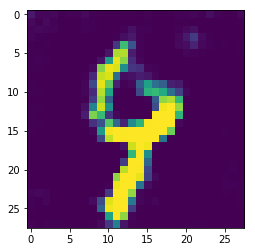

In [43]:
noise = np.random.normal(0, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(img[:,:,0])

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.model.summary()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [47]:
gan.discriminator.get_weights()[22]

IndexError: list index out of range

In [ ]:
x_train[0][16]

In [44]:
gan.model.save_weights('./run/0006/weights/weights.h5')